In [1]:
pip install polars matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Step 1: Import necessary libraries
import polars as pl
import matplotlib.pyplot as plt

In [3]:
# Step 2: Load the CSV file into a Polars DataFrame
file_path = 'Post-Secondary_Financial_Aid_Demographics_in_Colorado_20241017.csv'  # Adjust the path as necessary
df = pl.read_csv(file_path)

In [4]:
# Step 3: Select the relevant columns for analysis
df_filtered = df.select([
    'year', 'institutionName', 'sumStateAid', 'sumFederalPell', 'sumFederalLoans', 
    'sumOtherFederal', 'sumFederalPLUS', 'sumOtherLoans', 'sumOtherScholarships'
])

In [6]:
# Ensure the 'year' column is numeric
df_filtered = df_filtered.with_columns(pl.col('year').cast(pl.Int32))

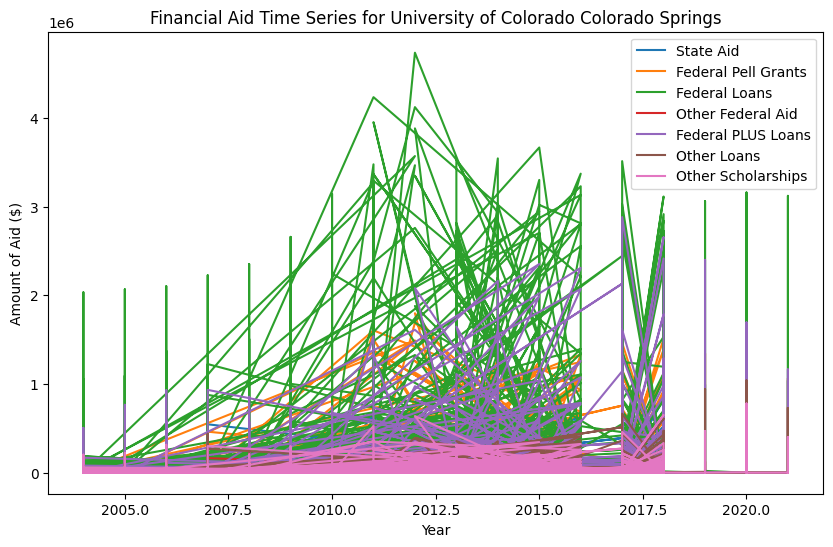

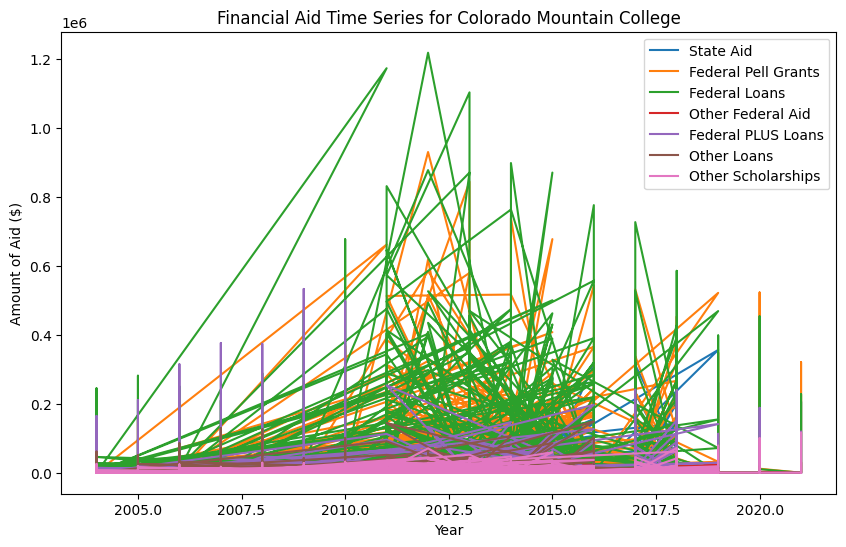

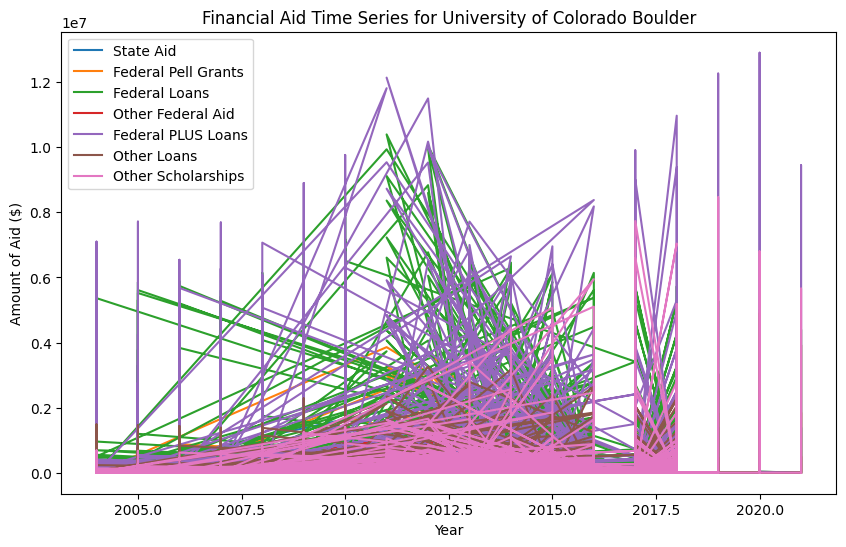

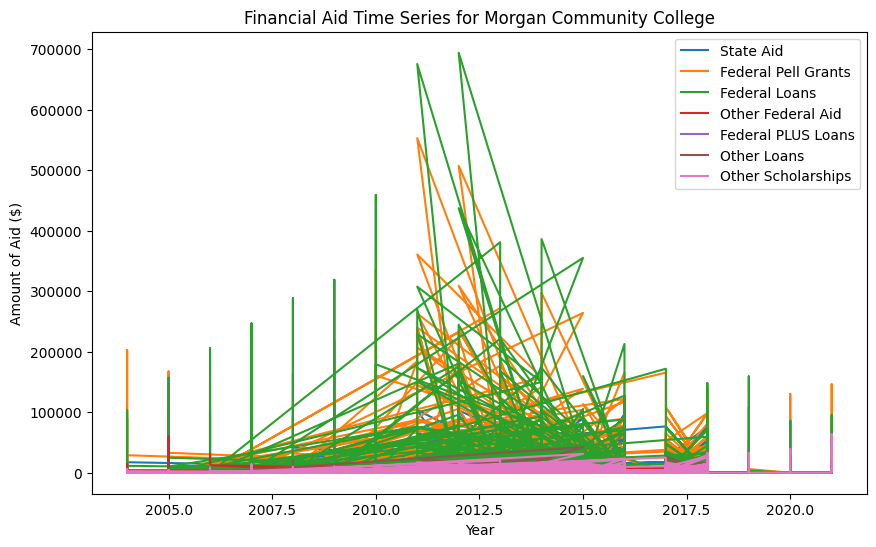

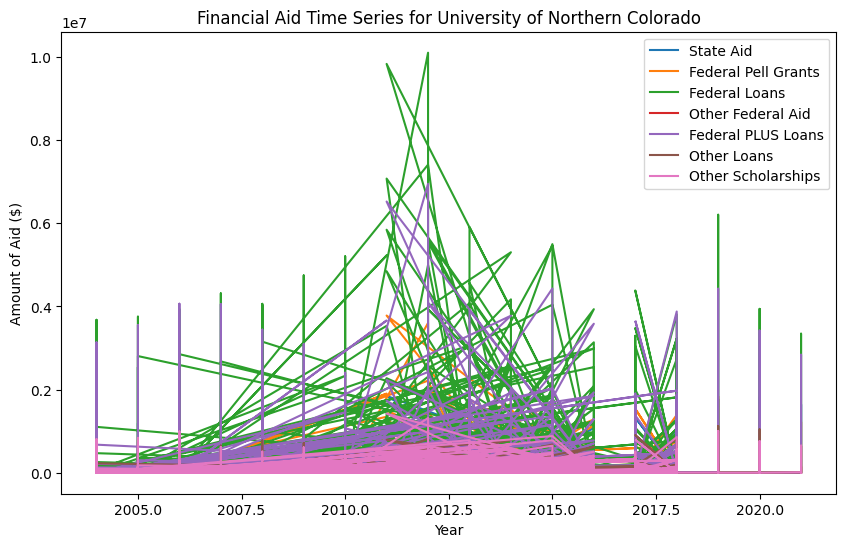

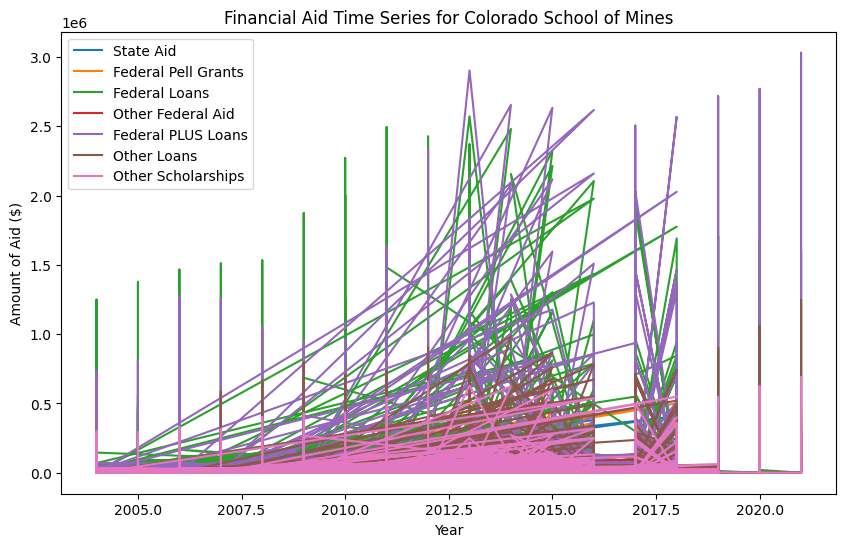

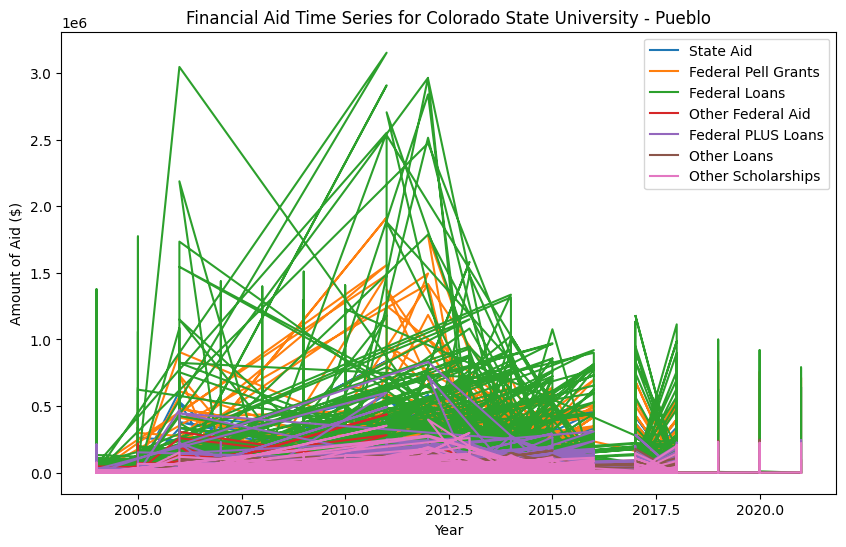

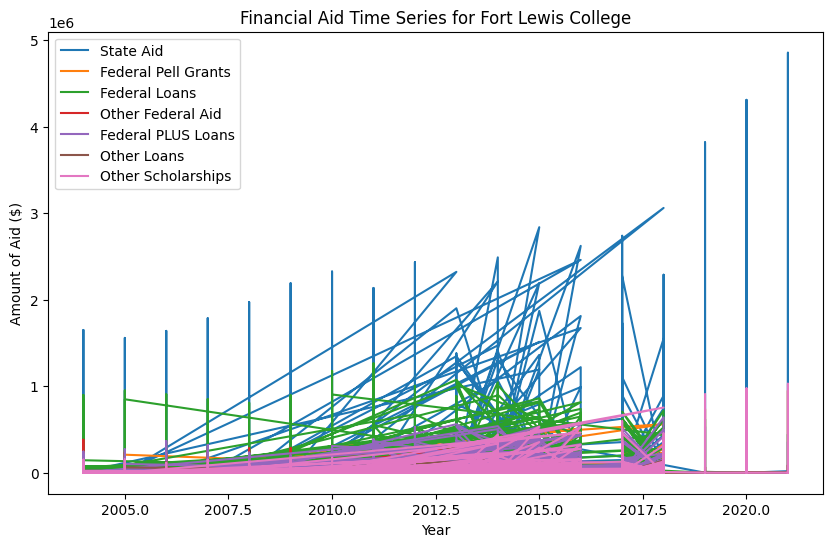

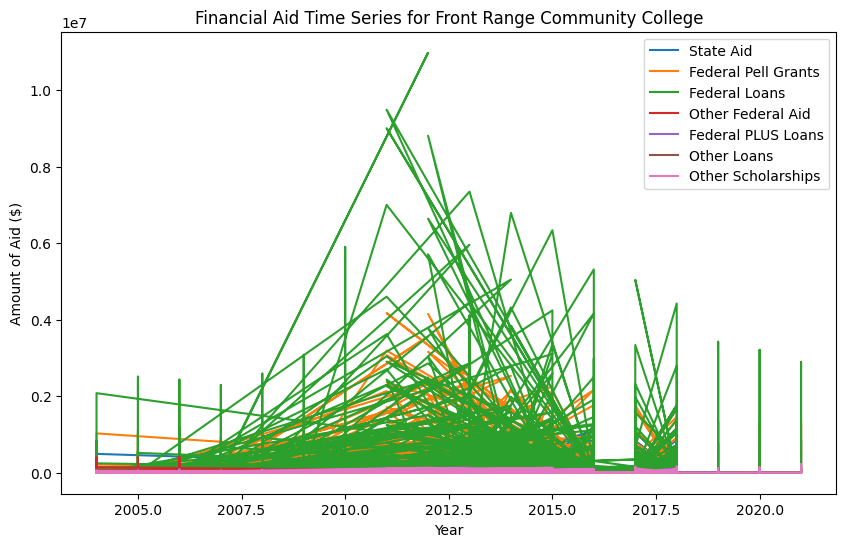

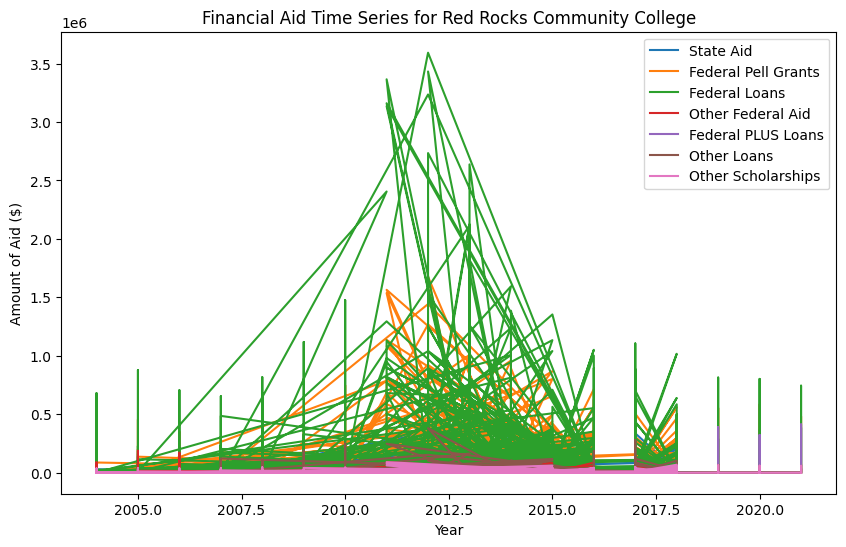

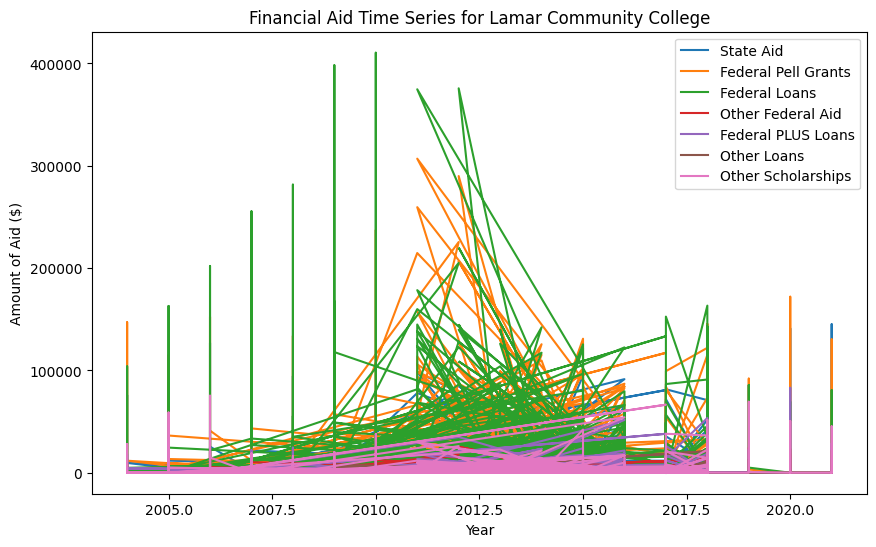

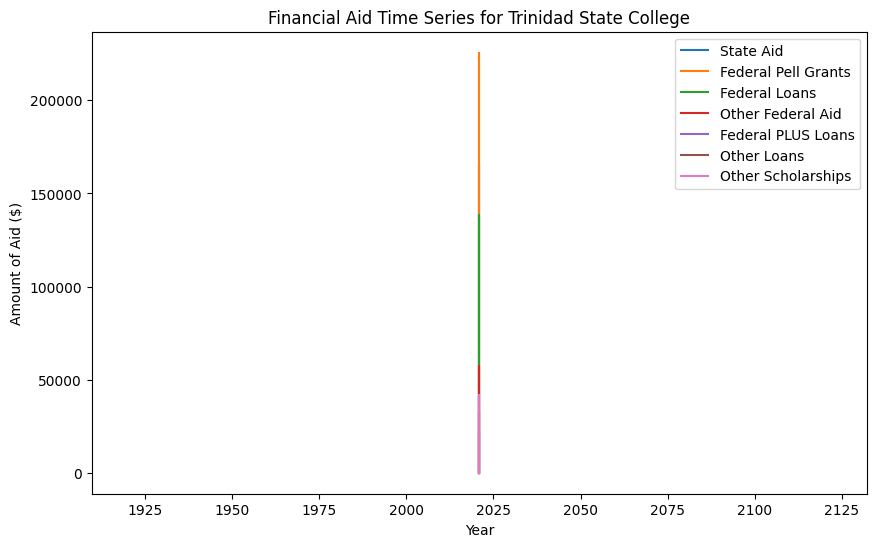

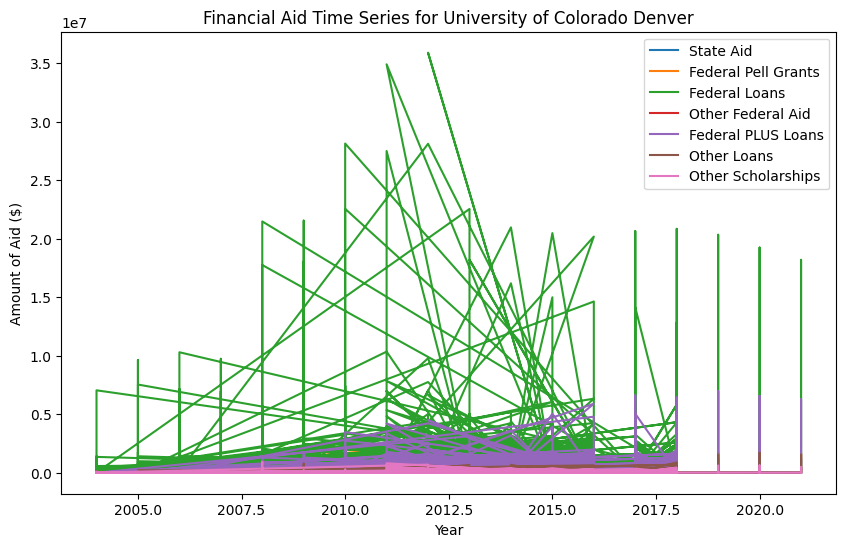

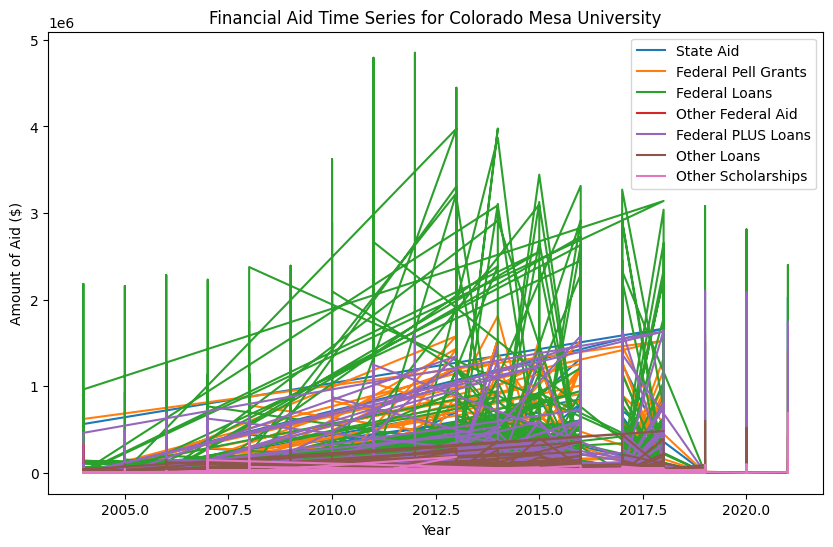

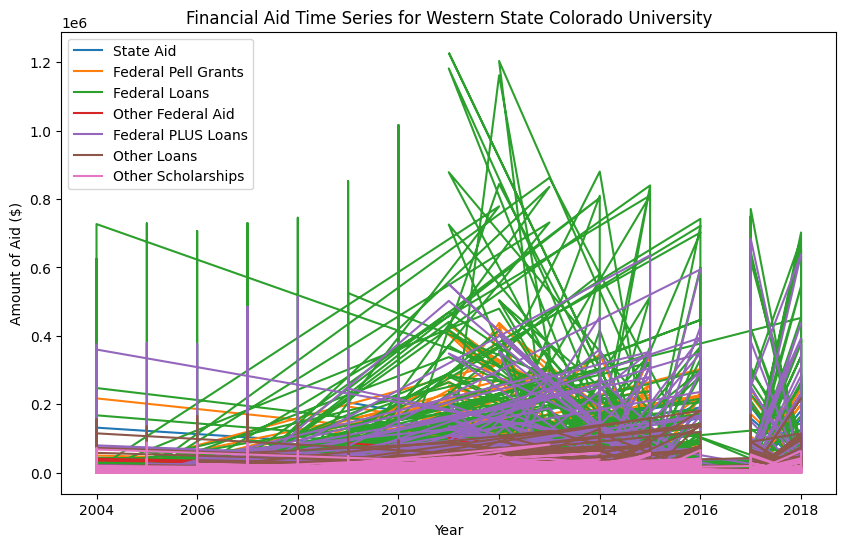

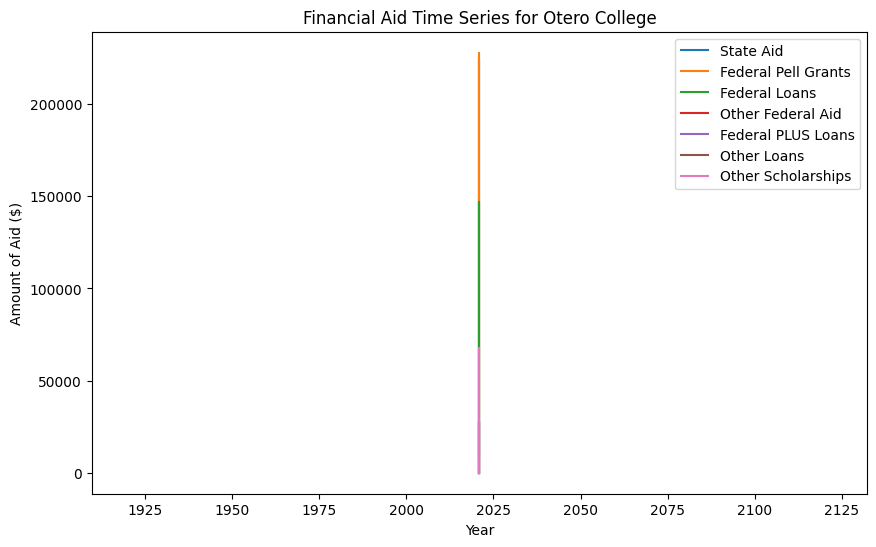

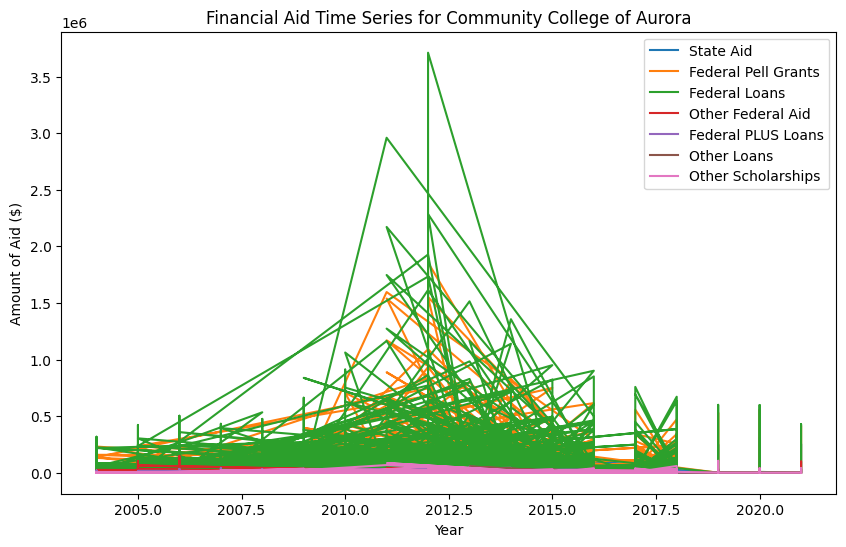

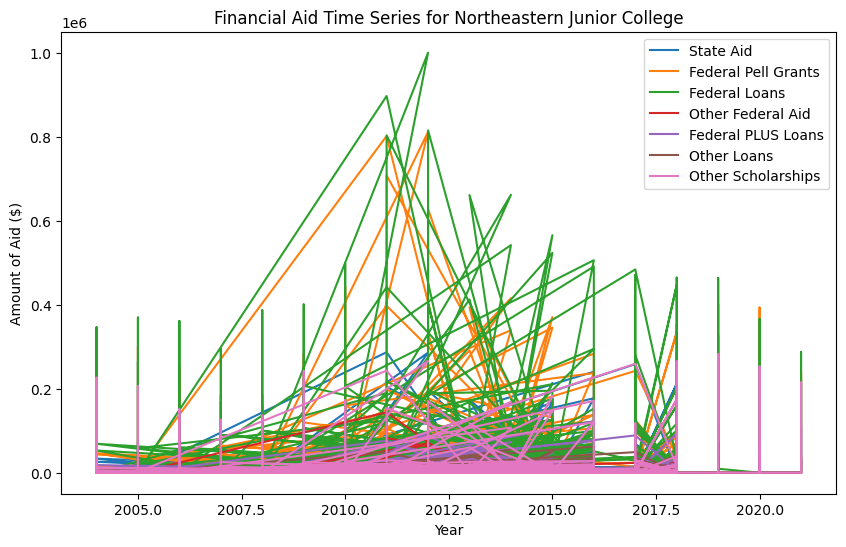

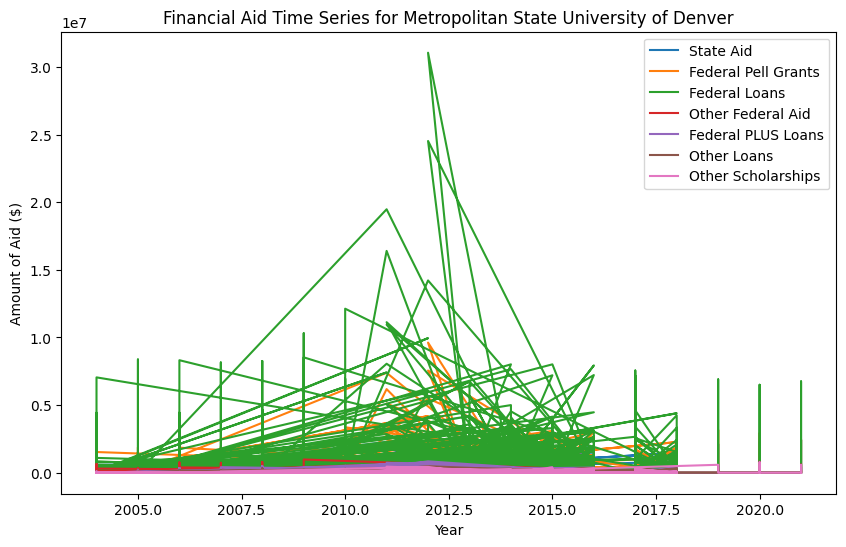

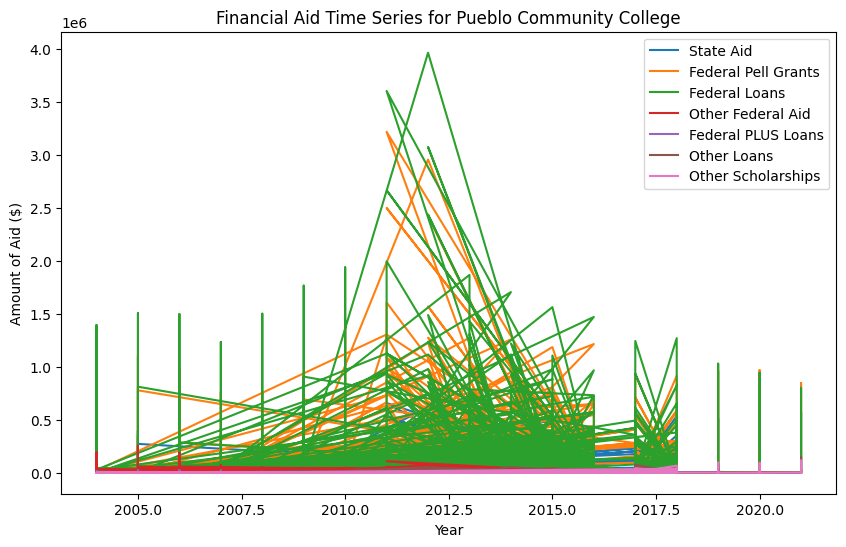

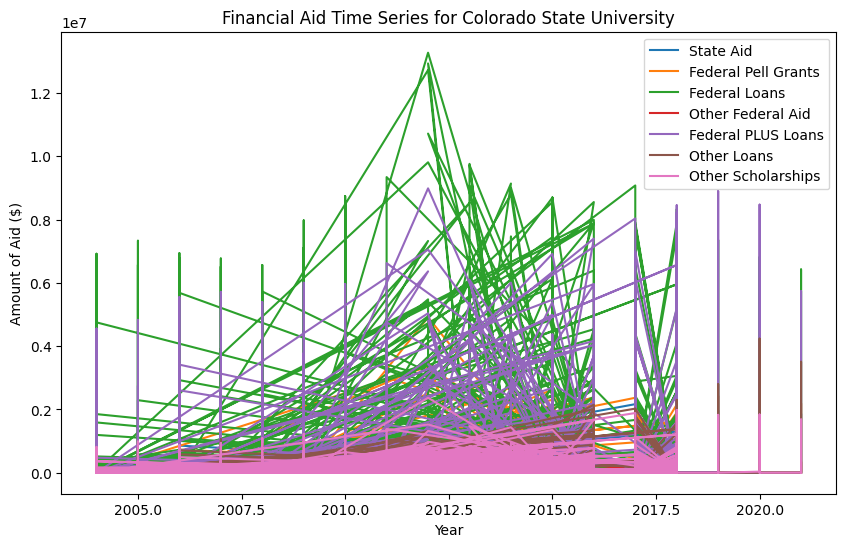

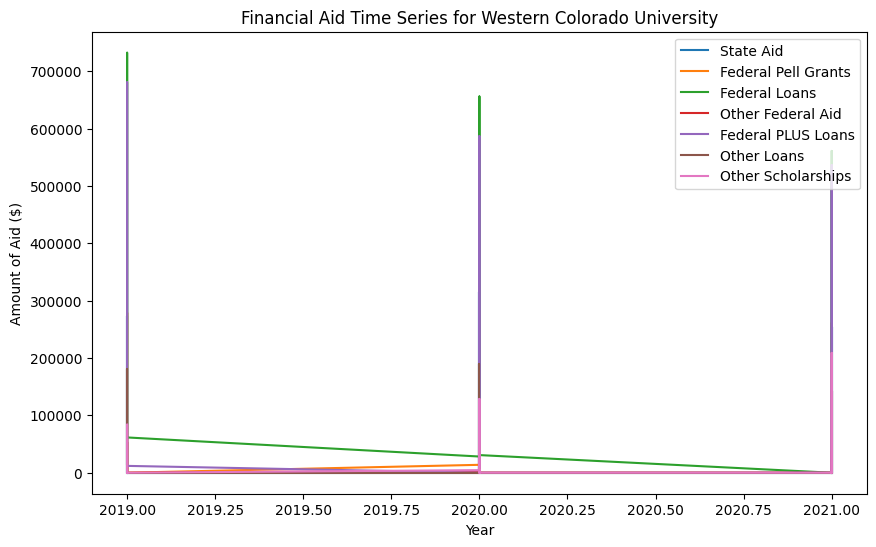

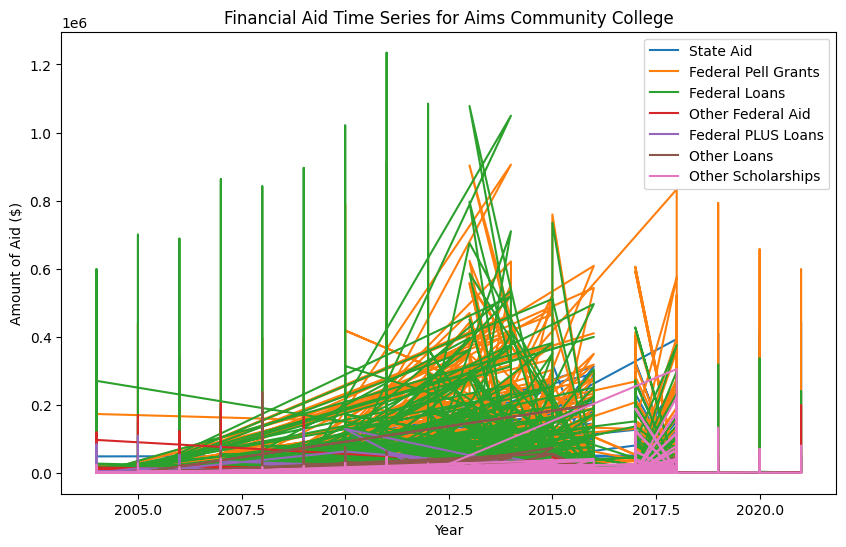

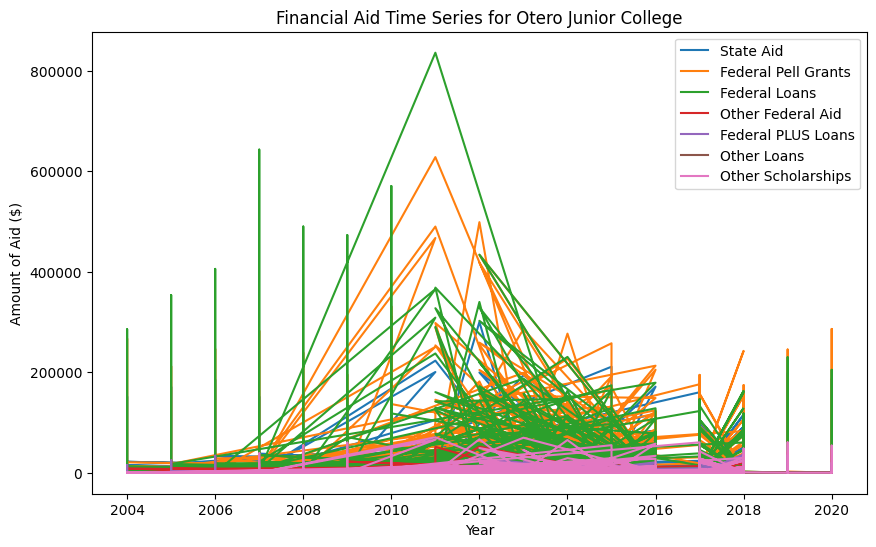

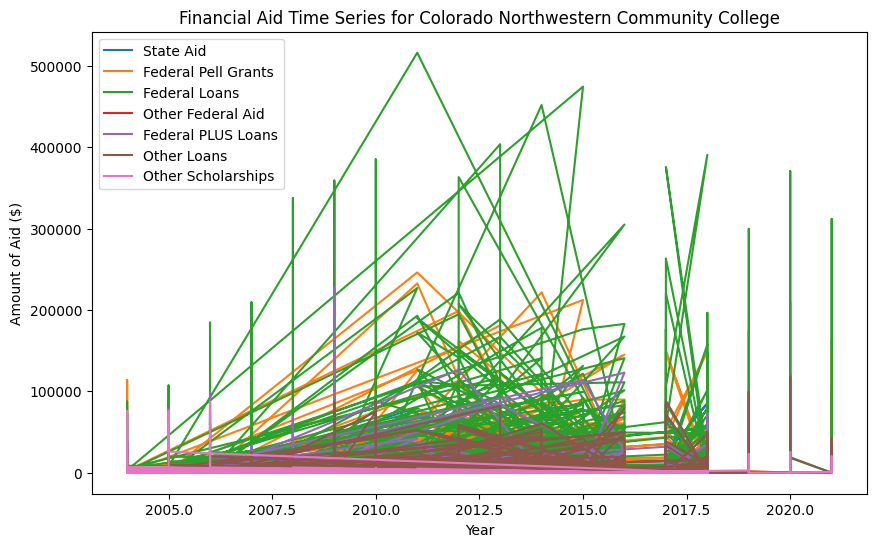

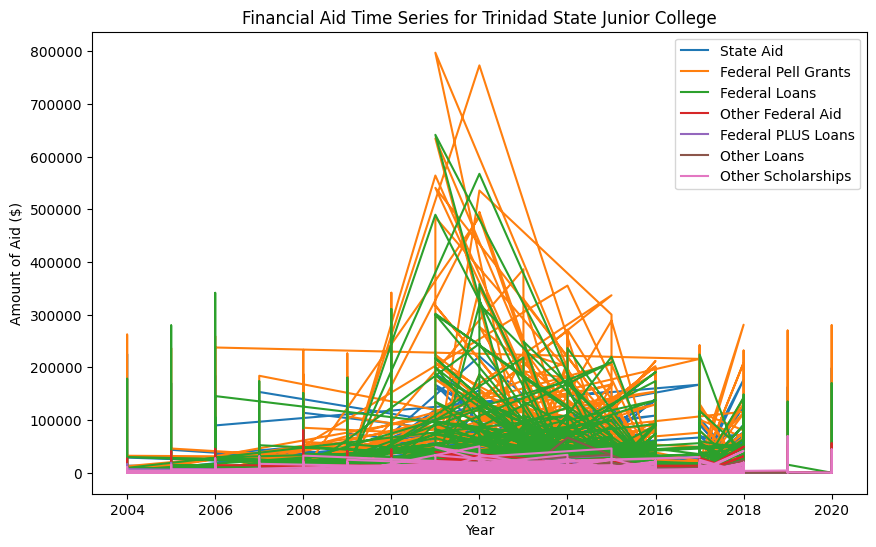

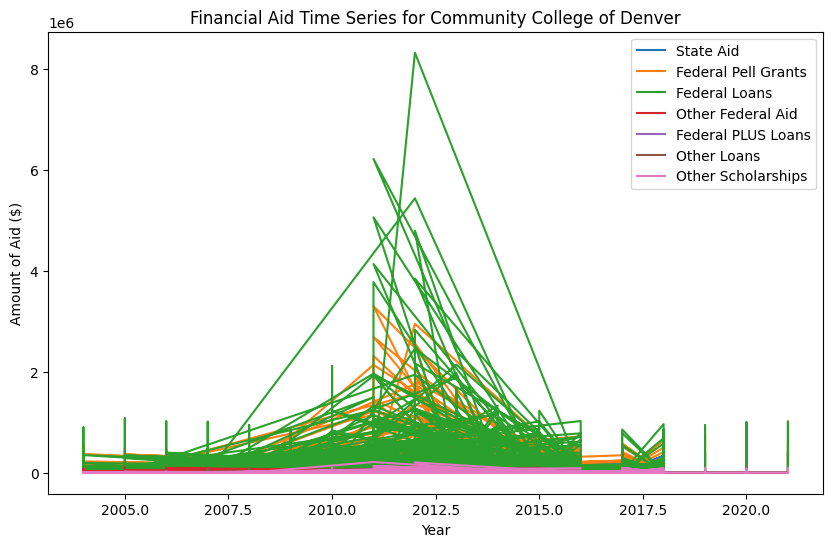

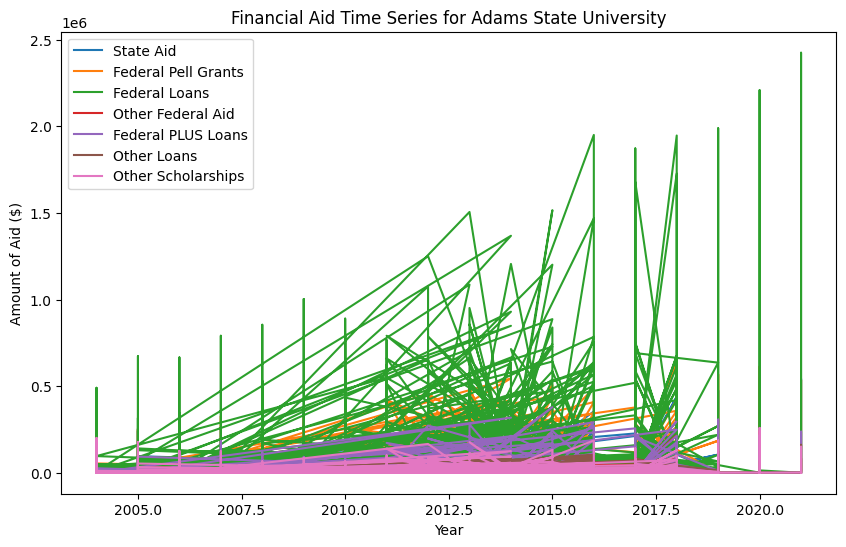

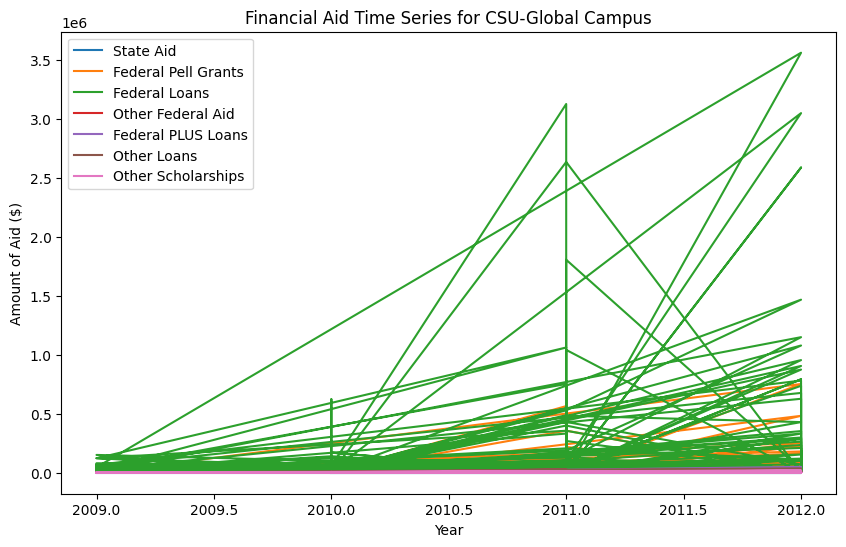

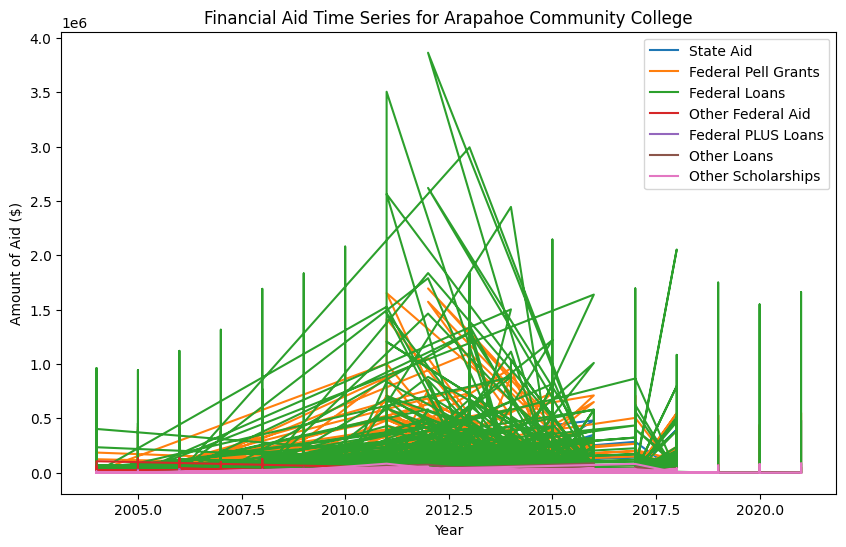

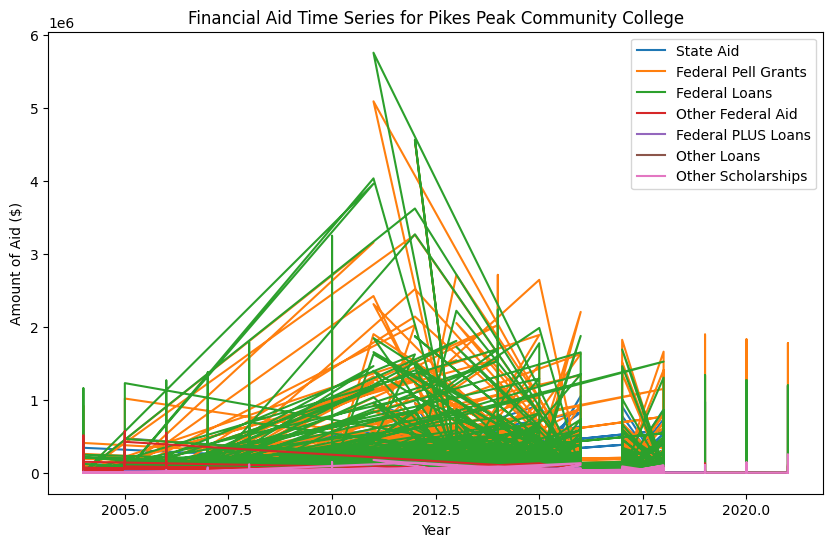

In [7]:
# Step 4: Create a time series graph for each institution
institutions = df_filtered.select('institutionName').unique()

# Iterate through each institution and plot the financial aid over time
for institution in institutions['institutionName'].to_list():
    # Filter the data for the specific institution
    institution_data = df_filtered.filter(pl.col('institutionName') == institution)
    
    # Plotting financial aid categories over time
    plt.figure(figsize=(10, 6))
    
    plt.plot(institution_data['year'], institution_data['sumStateAid'], label='State Aid')
    plt.plot(institution_data['year'], institution_data['sumFederalPell'], label='Federal Pell Grants')
    plt.plot(institution_data['year'], institution_data['sumFederalLoans'], label='Federal Loans')
    plt.plot(institution_data['year'], institution_data['sumOtherFederal'], label='Other Federal Aid')
    plt.plot(institution_data['year'], institution_data['sumFederalPLUS'], label='Federal PLUS Loans')
    plt.plot(institution_data['year'], institution_data['sumOtherLoans'], label='Other Loans')
    plt.plot(institution_data['year'], institution_data['sumOtherScholarships'], label='Other Scholarships')
    
    # Set title and labels
    plt.title(f"Financial Aid Time Series for {institution}")
    plt.xlabel('Year')
    plt.ylabel('Amount of Aid ($)')
    
    # Display the legend
    plt.legend()
    
    # Show the plot
    plt.show()